In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
train_raw = pd.read_csv('train.csv', index_col=0)
test_raw = pd.read_csv('test.csv', index_col=0) 
Id = np.arange(892,1310,1)

In [3]:
train_raw

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [42]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',] 
target = ['Survived']
all = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived'] 
X_train = train_raw[features]
y_train = train_raw[target]
X_test = test_raw[features]

In [43]:
#OneHotEncoding
X_train_ohe = pd.get_dummies(X_train) 
X_test_ohe = pd.get_dummies(X_test)
train_raw_ohe = pd.get_dummies(train_raw[all])
X_test_ohe.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
PassengerId,,,,,,,
892,3,34.5,0,0,7.8292,0,1
893,3,47.0,1,0,7.0000,1,0
894,2,62.0,0,0,9.6875,0,1
895,3,27.0,0,0,8.6625,0,1
896,3,22.0,1,1,12.2875,1,0


In [45]:
#Imputation 
from sklearn.preprocessing import Imputer
my_imputer = Imputer()
X_train_ohe= my_imputer.fit_transform(X_train_ohe)
X_test_ohe = my_imputer.transform(X_test_ohe)
X_test_ohe.shape
X_test_ohe = pd.DataFrame({'Pclass':X_test_ohe[:,0],'Age':X_test_ohe[:,1], 'SibSp':X_test_ohe[:,2], 'Parch':X_test_ohe[:,3], 'Fare':X_test_ohe[:,4], 'Sex_female':X_test_ohe[:,5], 'Sex_male':X_test_ohe[:,6]})
X_test_ohe

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3.0,34.500000,0.0,0.0,7.8292,0.0,1.0
1,3.0,47.000000,1.0,0.0,7.0000,1.0,0.0
2,2.0,62.000000,0.0,0.0,9.6875,0.0,1.0
3,3.0,27.000000,0.0,0.0,8.6625,0.0,1.0
4,3.0,22.000000,1.0,1.0,12.2875,1.0,0.0
5,3.0,14.000000,0.0,0.0,9.2250,0.0,1.0
6,3.0,30.000000,0.0,0.0,7.6292,1.0,0.0
7,2.0,26.000000,1.0,1.0,29.0000,0.0,1.0
8,3.0,18.000000,0.0,0.0,7.2292,1.0,0.0
9,3.0,21.000000,2.0,0.0,24.1500,0.0,1.0


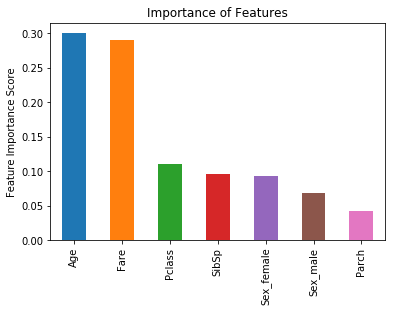

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report


baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(X_train_ohe,y_train.values.ravel())
predictors=['Pclass','Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male']

feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
y_pred=baseline.predict(X_test_ohe)


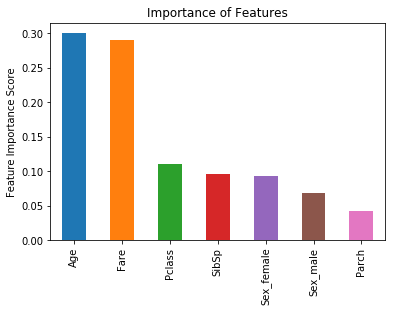

In [48]:
baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(X_train_ohe,y_train.values.ravel())
predictors=['Pclass','Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male']

feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
y_pred=baseline.predict(X_test_ohe)


In [49]:
my_submission = pd.DataFrame({'PassengerId' : Id, 'Survived': y_pred})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)